<p align="center"> Machine Learning</p>

 <p align="center">  Autor: Ing. Julian Camilo Restrepo Angel</p>


# Acción 1: Aplicación modelos lineales.

- a. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).
- b. Con la base de entrenamiento aplicar un modelo de regresión lineal para predecir la productividad real a partir del número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba.
- d. Con los resultados del ítem anterior, realizar un diagrama de dispersión, en el eje X ubicar los valores predichos y en el eje Y ubicar los valores de productividad real.

# Desarrolllo Acción 1: 

# Importación de librerias y carga de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carga de datos
data = pd.read_csv('C:\CAMILO\CIENCIA DE DATOS\MACHINE LEARNING\Fase 3 - Componente práctico - Prácticas simuladas\Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')

# Visualiza las primeras filas del DataFrame para visualizar la carga correcta de los datos 
print(data.head())


# Exploración y preparación de los datos

In [7]:
# Información del DataFrame
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Revisa valores nulos
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# Division de los datos del conjunto de entrenamiento y prueba

Vamos a seleccionar las variables 'no_of_workers' y 'over_time' como variables independientes y 'actual_productivity' como variables dependiente. Finalmente se imprimen la cantidad de datos de entrenamiento y de prueba considerando los requerimientos del ejercicio, para el caso el 80% de datos del dataframe son para entrenamiento y el 20 % son de prueba

In [8]:
# Variables independientes y dependiente
X = data[['no_of_workers', 'over_time']]
y = data['actual_productivity']

# División en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')


Tamaño del conjunto de entrenamiento: (957, 2)
Tamaño del conjunto de prueba: (240, 2)


# Aplicacion del modelo de regresión lineal 

Considerando los datos obtenidos anteriormente se utilizan los datos de entrenamiento para entrenar el modelo. 

In [9]:
# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f'Coeficientes: {model.coef_}')
print(f'Intersección: {model.intercept_}')


Coeficientes: [-3.36990069e-04 -1.10343200e-06]
Intersección: 0.7488332056699673


# Predicción y evaluación del modelo 

Se realizan las predicciones sobre el conjunto de pruebas y se evalua el desempeño del modelo. 

In [10]:
# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Coeficiente de determinación (R^2): {r2}') #R cuadrado


Error Cuadrático Medio (MSE): 0.026616567260178005
Raíz del Error Cuadrático Medio (RMSE): 0.16314584659187006
Coeficiente de determinación (R^2): -0.002414116085998952


# Visualización de los resultados.

Se implementa la grafica para visualizar los resultados del modelo, en ella se comparan los valores predichos con los valores reales del conjunto de datos obtenidos en la planta de confecciones.

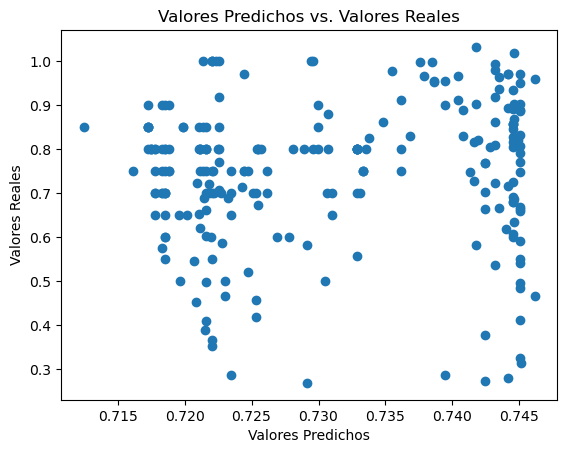

In [11]:
# Diagrama de dispersión
plt.scatter(y_pred, y_test)
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Valores Predichos vs. Valores Reales')
plt.show()


 #  Interpretación y conclusiones del modelo

El diagrama de dispersión implementado tiene los valores predichos en el eje X y los valores reales en el eje Y. 

### Identidad del modelo: 

En un modelo de regresión lineal perfecto, todos los puntos caerían exactamente en una diagonal recta que pasa por el origen, con pendiente 1 (es decir una linea y = x). Esto indicará que para cada valor predicho, el valor real es exactamente igual. 

### Distribución de los puntos: 

Si posisionamos una linea diagonal sobre el grafico los puntos se mostrarian muy dispersos alrededor de la misma, esto indica que el modelo tiene errores significativos en las predicciones. 

# Sesgo del modelo: 

## Subestimación o sobreestimación: 

Los puntos tienden a estar sistematicamente por debajo de la linea por lo cual el modelo tiende a sobrestimar los valores reales. 

## Evaluacion visual del modelo: 

Considerando la caracteristica del grafico implementado, el modelo tiene un mal rendimiento y puede no ser muy util para predicciones precisas considerando que los puntos estan muy dispersos, esto nos puede ayudar productivamente a identificar areas de mejora en el sistema productivo las cuales pueden venir dadas de acuerdo a algunas condiciones particulares como horas especificas del día y el numero de trabajadores. 

Particularmente este modelo ayuda a identificar areas de mejora considerando la evaluación cuantitativa y cualitativa para verificar el error promedio del modelo, con ello podemos identificar areas de mejora fisica y entender las limitaciones a nivel de precision del modelo. 

# Acción 2: Aplicación modelo logístico.

- a. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.
- b. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

# Desarrolllo Acción 2:

# Importación de los datos y creación de la variable solicitada

Se preparan los datos del modelo, considerando el tipo de aplicación en este caso "Modelo Logistico", lo cual requiere que se importe la librería del modelo lineal de regresión logistica "LogisticRegression" e implementar la variable de "nivel_productividad" con niveles alto y bajo

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
data = pd.read_csv('C:\CAMILO\CIENCIA DE DATOS\MACHINE LEARNING\Fase 3 - Componente práctico - Prácticas simuladas\Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')

# Se crea la variable 'nivel_productividad'
data['nivel_productividad'] = np.where(data['actual_productivity'] > 0.7, 'alto', 'bajo')

# Se imprimen las primeras columnas del conjunto de datos para validar la carga de los mismos
print(data.head())


       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity nivel_productividad  
0                   0           59.0             0.940725                alto  
1   

# Aplicacion del modelo de regresión logistica

Se dividen los datos del conjunto de entrenamiento y prueba, posteriormente se entrena el modelo de regresión logistica. 

In [13]:
# Variables independientes y dependiente
X = data[['no_of_workers', 'over_time']]
y = data['nivel_productividad']

# División en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

# Modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenamiento del modelo
logistic_model.fit(X_train, y_train)


Tamaño del conjunto de entrenamiento: (957, 2)
Tamaño del conjunto de prueba: (240, 2)


LogisticRegression()

# Predicción y evaluación del modelo

Se realiza las predicciones y evaluación de la precision del modelo. 

In [14]:
# Predicciones
y_pred = logistic_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')


Precisión del modelo: 0.7083333333333334


## Evalucion del modelo actual 

In [15]:
# Calculo de la Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')


Precisión del modelo: 0.71


## Evaluación completa 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión:\n{conf_matrix}')

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print(f'Reporte de clasificación:\n{class_report}')



Matriz de confusión:
[[170   0]
 [ 70   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.71      1.00      0.83       170
        bajo       0.00      0.00      0.00        70

    accuracy                           0.71       240
   macro avg       0.35      0.50      0.41       240
weighted avg       0.50      0.71      0.59       240



c:\Users\julian.restrepo\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julian.restrepo\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julian.restrepo\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

# Grafico



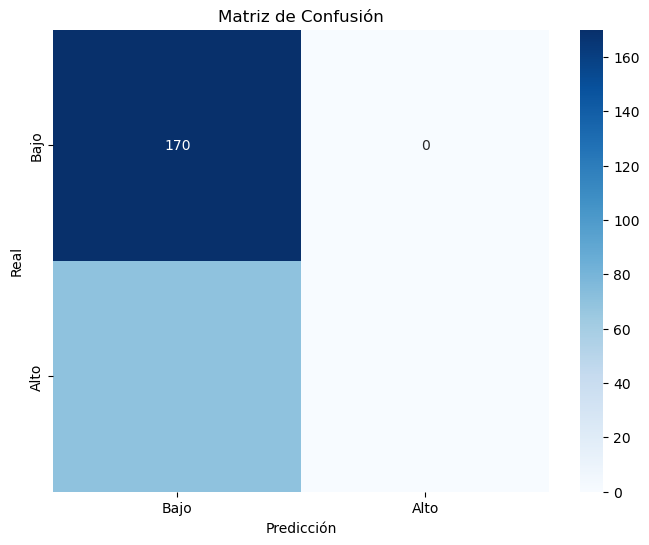

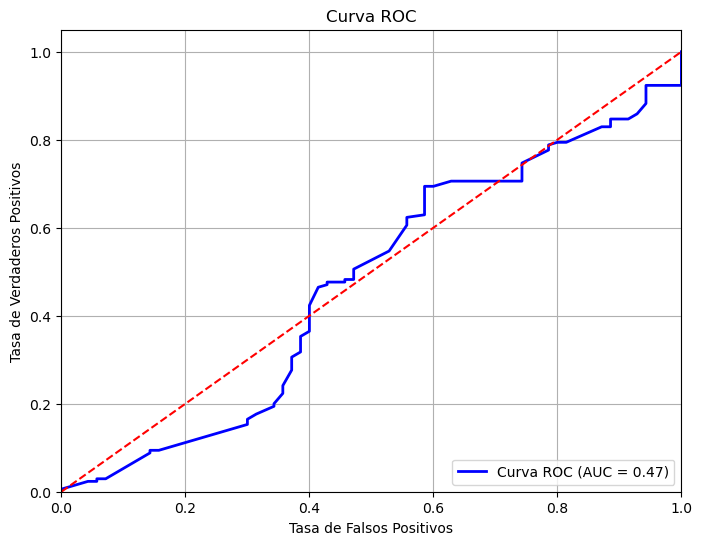

In [17]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Alto'], yticklabels=['Bajo', 'Alto'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# S implementa el grafico con Curva ROC y AUC
y_test_bin = np.where(y_test == 'alto', 1, 0)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Interpretación del modelo

## Presicion del modelo:

La precision del modelo indica el porcentaje de predicciones correctas realizadas por el modelo de conjunto de pruebas. Para este caso 0.71, esto nos permite clasificar correctamente los niveles de productividad. 

Segun el contexto expecifico estudiado para el modelo de regresión logistica se pueden tener algunas consideraciones para determinar un valor alto o bajo de precisión, en el caso de Benchmarking es posible comparar la precision del modelo con la precision de los modelos previos por ejemplo si los modelos anteriores lograban una precision del 75% cualquier mejora sobre este indice puede considerarse alta. 

Segun los rangos particulares de las reglas de presicion la obtenida puede considerarse como "Moderada", este rango puede ser util pero hay espacio de mejoras, en el contexto de negocio "Productividad en fabrica"  la precision requerida puede ser mas alta puesto a que en algunos casos debe existir menos tolerancias a errores dependiendo de las decisiones basadas en el modelo y en la fabrica. 

## conclusion 

El modelo puede ser util (ver grafico ROC y AUC), pero puede necesitar ajustes o la inclusión de mas variables independientes para mejorar su precision o realizar una evaluación mas robusta el modelo, como el analisis segun la matriz de confusión y de clasificación. 


# Acción 3: Aplicación K-NN.

- a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
- b. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

# Preparación de los datos y librerías necesarias


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('C:\CAMILO\CIENCIA DE DATOS\MACHINE LEARNING\Fase 3 - Componente práctico - Prácticas simuladas\Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')

# Crear la variable 'nivel_productividad'
data['nivel_productividad'] = np.where(data['actual_productivity'] > 0.7, 'alto', 'bajo')

# Seleccionar las variables independientes y la variable dependiente
X = data[['no_of_workers', 'over_time']]
y = data['nivel_productividad']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características (esto es importante para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Entrenamiento del modelo KNN (Vecino mas cercano)

In [19]:
# Definir el modelo KNN (puedes ajustar el número de vecinos 'n_neighbors' según sea necesario)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

# Predicciones correspondientes

In [20]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = knn_model.predict(X_test)


# Evaluación del modelo

Precisión del modelo KNN: 0.65
Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.72      0.83      0.77       170
        bajo       0.36      0.23      0.28        70

    accuracy                           0.65       240
   macro avg       0.54      0.53      0.53       240
weighted avg       0.62      0.65      0.63       240

Matriz de confusión:
[[141  29]
 [ 54  16]]


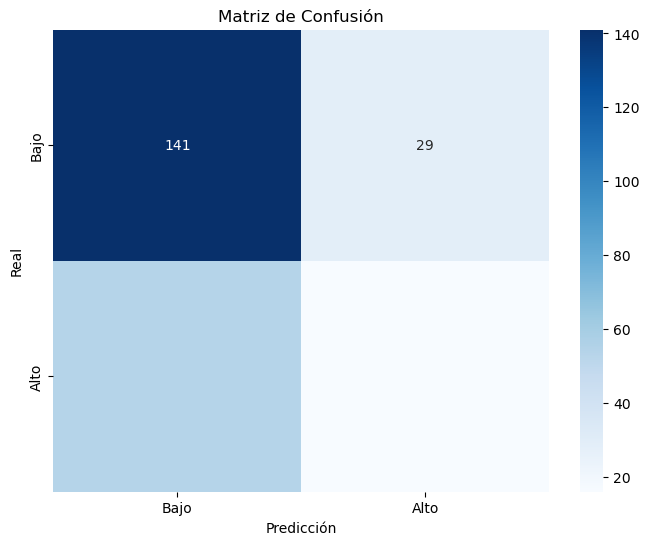

In [21]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy:.2f}')

# Imprimir el reporte de clasificación
print(f'Reporte de clasificación:\n{classification_report(y_test, y_pred)}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión:\n{conf_matrix}')

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Alto'], yticklabels=['Bajo', 'Alto'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# Interpretación 

## Numero de vecinos (n_neighbors): 

Para este caso practico del valor de n_neighbors puede ajustarse el rendimiento del modelo. Generalmente, valores mas bajos pueden captar mejor las relaciones locales, mientras que valores mas altos pueden suavizar el modelo. 

la normalización de las caractertisticas es crucial para KNN ya que en este algoritmo se basa en la distancia entre puntos de datos. 

# Acción 4: Aplicación Árboles de decisión (CART).

- a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
- b. Usando la función graphviz() visualizar el diagrama de árbol.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.


# Desarrollo accion 4: 

# Preparación y carga de datos e importación de librerías: 

Se importan las librerías, se cargan los datos y se implementa la variable de nivel de productividad.

In [22]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import graphviz

# Cargar los datos
data = pd.read_csv("C:\CAMILO\CIENCIA DE DATOS\MACHINE LEARNING\Fase 3 - Componente práctico - Prácticas simuladas\Anexo 2 - Predicción de la productividad de los empleados de la confección.csv")

# Verificar los primeros registros de los datos
print(data.head())

# Separar las características (features) de la variable objetivo (target)
X = data.drop(columns=['date', 'actual_productivity'])  # características
y = data['actual_productivity']  # variable objetivo

# Se convierten las variables categóricas en variables numéricas
X_encoded = pd.get_dummies(X)

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Se convierte la variable objetivo a categórica
y_categorica = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=['Bajo', 'Alto'])

# Se dividen los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_categorica, test_size=0.2, random_state=42)

# Se implementa el modelo de árbol de decisiones
model = DecisionTreeClassifier()

# Entrenamiento del modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se visualiza el diagrama del árbol de decisiones implementado
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['Bajo', 'Alto'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("productividad_confeccion_tree")

# Se realizan las predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Acción 5: Conclusiones.

- Redacte unas conclusiones generales (en una celda markdown) de los resultados de las acciones 1 a 4.

## Conclusion 1 

Las acciones 1 a 4 ofrecen un enfoque integral para abordar el problema de predecir la productividad de los empleados en la industria de la confección, utilizando una variedad de técnicas de aprendizaje automático y herramientas de visualización. Los resultados obtenidos de estos análisis pueden ser utilizados por los tomadores de decisiones para mejorar la eficiencia y el rendimiento en las fábricas de confección, lo que finalmente puede conducir a una mayor productividad y rentabilidad.

## conclusion 2. 

Las acciones demuestran la versatilidad de las técnicas de aprendizaje automático para abordar problemas complejos en diversos dominios, como la industria de la confección.

## conclusione 3. 
Desde modelos lineales simples hasta árboles de decisión más complejos, las diferentes técnicas proporcionan opciones flexibles para modelar y predecir la productividad de los empleados.

## Conclusion 4.

Los modelos desarrollados en estas acciones resaltan la importancia de la planificación y gestión efectiva de los recursos en la industria de la confección.

## conclusion 5. 

El número de trabajadores, el tiempo extra y otros factores relacionados con la mano de obra tienen un impacto significativo en la productividad, lo que subraya la necesidad de una asignación eficiente de recursos y una gestión adecuada del tiempo en las fábricas de confección.

# Referencias

Regresión logística Python. (s. f.). https://cienciadedatos.net/documentos/py17-regresion-logistica-python.html

Aprende machine learning 

Na, & Na. (2019, 16 mayo). Regresión Logística en Python | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

Regresión Lineal

Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. (pp. 133-142). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1566405&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_133
Descenso máximo del gradiente

Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 37-39). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_37
Regresión Logística

Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 60-75, 325, 331). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_60
Árboles de Decisión.

Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. (pp. 183-195). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1566405&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_183
Método del vecino más cercano

Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 103-107). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_103
Métricas de evaluación 

George Kyriakides, & Konstantinos G. Margaritis. (2019). Hands-On Ensemble Learning with Python: Build Highly Optimized Ensemble Machine Learning Models Using Scikit-learn and Keras. (pp. 15-20). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=2204655&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_15